### How to push to github
##### Write the following in the git terminal:
##### git add *
##### git commit -m "Write the changes in the file that were done here"
##### git push

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import kn
from scipy.integrate import quad
import csv
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint
import pandas as pd

In [332]:
%run CrossSectionFunctions.ipynb

particle_mass = {
    'Proton': 1e-10,
    'Neutron': 1e-10,
    'Lambda': 1e-9,
    'ChargedPion': 1e-11,
    'NeutralPion': 1e-11,
    'ChargedKaon': 0.5e-10,
    'NeutralKaon': 0.5e-10,
}

particle_cross_sections = {
    'Proton': 1e-6,
    'Neutron': 1e-6,
    'Lambda': 1e-9,
    'ChargedPion': 1e-5,
    'NeutralPion': 1e-6,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 1e-7,
}

# PARTICLE RATIOS TO SCALE THE X VALUES. EVERYTHING IS SCALED BASED OFF THE NEUTRAL PION AS IT IS THE LIGHTEST HADRON
R_NP = particle_mass.get("NeutralPion")/particle_mass.get("Lambda")
R_CP = particle_mass.get("ChargedPion")/particle_mass.get("Lambda")
R_NK = particle_mass.get("NeutralKaon")/particle_mass.get("Lambda")
R_CK = particle_mass.get("ChargedKaon")/particle_mass.get("Lambda")
R_L = 1
R_P = particle_mass.get("Proton")/particle_mass.get("Lambda")
R_N = particle_mass.get("Neutron")/particle_mass.get("Lambda")

particle_ratios = {
    "ChargedPion": R_CP,
    "ChargedKaon": R_CK,
    "NeutralPion": R_NP,
    "NeutralKaon": R_NK,
    "Lambda": R_L,
    "Proton": R_P,
    "Neutron": R_N,
}

Frozen-out value of Proton with sigma = 1e-06, and mass = 1e-10 GeV is [0.0007451]
Frozen-out value of Neutron with sigma = 1e-06, and mass = 1e-10 GeV is [0.0007451]
Frozen-out value of Lambda with sigma = 1e-09, and mass = 1e-09 GeV is [0.18943143]
Frozen-out value of ChargedPion with sigma = 1e-05, and mass = 1e-11 GeV is [9.55596583e-05]
Frozen-out value of NeutralPion with sigma = 1e-06, and mass = 1e-11 GeV is [0.00075049]
Frozen-out value of ChargedKaon with sigma = 1e-06, and mass = 5e-11 GeV is [0.00074575]
Frozen-out value of NeutralKaon with sigma = 1e-07, and mass = 5e-11 GeV is [0.00548518]
Frozen-out values:  [7.45100592e-04 7.45100592e-04 1.89431433e-01 9.55596583e-05
 7.50489387e-04 7.45754341e-04 5.48517600e-03]
Particle masses: [1.e-10 1.e-10 1.e-09 1.e-11 1.e-11 5.e-11 5.e-11]
Σm_i*Y_i = 1.899004600483734e-10 GeV


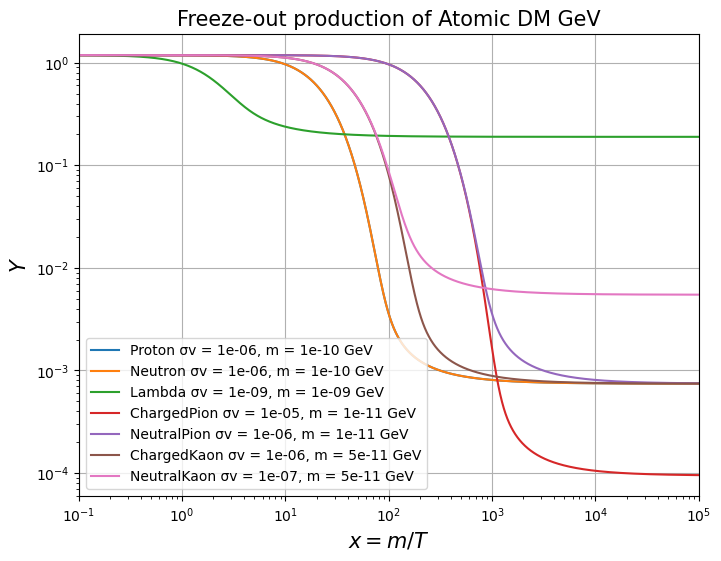

In [336]:
%run FreezeOutFunctions.ipynb
#%run CrossSectionFunctions.ipynb

particles = ["Proton", "Neutron", "Lambda", "ChargedPion", "NeutralPion", "ChargedKaon", "NeutralKaon"]
plt.figure(figsize=(8, 6))

x=np.logspace(np.log10(0.1),np.log10(100000),10000)
#xx=np.logspace(np.log10(0.1),np.log10(1000),10000)
#plt.loglog(xx,Y_EQ(xx, 'TestMeson'),'c',label=r'$Y_{\rm eq}$')

FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    cross_section = particle_cross_sections.get(particle,1)
    mass = particle_mass.get(particle,1)
    
    k=fk(particle)
    Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))
    
    print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y[-1]}')
    
    plt.loglog(x,Y,label=f'{particle} σv = {cross_section}, m = {mass} GeV')
    
    FreezeOutNumber = np.append(FreezeOutNumber,Y[-1])
    masses = np.append(masses, mass)

print('Frozen-out values: ', FreezeOutNumber)
#print(f'Sum of frozen-out values: {np.sum(FreezeOutNumber)}')
print(f'Particle masses: {masses}')
print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

#plt.ylim(1E-8,1e2)
plt.xlim(0.1,100000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-out production of Atomic DM GeV', size= 15)
plt.legend()
plt.grid()
plt.savefig('Particles.png')

In [159]:
"""
particle_ratios = {
    "ChargedPion": R_CP,
    "ChargedKaon": R_CK,
    "NeutralPion": R_NP,
    "NeutralKaon": R_NK,
    "Lambda": R_L,
    "Proton": R_P,
    "Neutron": R_N,
    "TestMeson": R_testMeson,
    "TestBaryon": R_testBaryon
}

particle_mass = {
    'Proton': 1e-5,
    'Neutron': 1e-5,
    'Lambda': 1e-3,
    'ChargedPion': 1e-7,
    'NeutralPion': 1e-7,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 1e-6,
    'TestBaryon': 1e-5,
    'TestMeson': 1e-5,
}

particle_cross_sections = {
    'Proton': 1e-8,
    'Neutron': 1e-8,
    'Lambda': 1e-9,
    'ChargedPion': 1e-10,
    'NeutralPion': 1e-10,
    'ChargedKaon': 1e-10,
    'NeutralKaon': 1e-10,
    "TestMeson": 1e-7
}
"""


"""
particle_mass = {
    'Proton': 1e-10,
    'Neutron': 1e-10,
    'Lambda': 1e-9,
    'ChargedPion': 1e-11,
    'NeutralPion': 1e-11,
    'ChargedKaon': 0.5e-10,
    'NeutralKaon': 0.5e-10,
}

particle_cross_sections = {
    'Proton': 1e-6,
    'Neutron': 1e-6,
    'Lambda': 1e-9,
    'ChargedPion': 1e-5,
    'NeutralPion': 1e-6,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 1e-7,
}

# PARTICLE RATIOS TO SCALE THE X VALUES. EVERYTHING IS SCALED BASED OFF THE NEUTRAL PION AS IT IS THE LIGHTEST HADRON
R_NP = particle_mass.get("NeutralPion")/particle_mass.get("Lambda")
R_CP = particle_mass.get("ChargedPion")/particle_mass.get("Lambda")
R_NK = particle_mass.get("NeutralKaon")/particle_mass.get("Lambda")
R_CK = particle_mass.get("ChargedKaon")/particle_mass.get("Lambda")
R_L = 1
R_P = particle_mass.get("Proton")/particle_mass.get("Lambda")
R_N = particle_mass.get("Neutron")/particle_mass.get("Lambda")

particle_ratios = {
    "ChargedPion": R_CP,
    "ChargedKaon": R_CK,
    "NeutralPion": R_NP,
    "NeutralKaon": R_NK,
    "Lambda": R_L,
    "Proton": R_P,
    "Neutron": R_N,
}
"""

'\nparticle_ratios = {\n    "ChargedPion": R_CP,\n    "ChargedKaon": R_CK,\n    "NeutralPion": R_NP,\n    "NeutralKaon": R_NK,\n    "Lambda": R_L,\n    "Proton": R_P,\n    "Neutron": R_N,\n    "TestMeson": R_testMeson,\n    "TestBaryon": R_testBaryon\n}\n\nparticle_mass = {\n    \'Proton\': 1e-5,\n    \'Neutron\': 1e-5,\n    \'Lambda\': 1e-3,\n    \'ChargedPion\': 1e-7,\n    \'NeutralPion\': 1e-7,\n    \'ChargedKaon\': 1e-6,\n    \'NeutralKaon\': 1e-6,\n    \'TestBaryon\': 1e-5,\n    \'TestMeson\': 1e-5,\n}\n\nparticle_cross_sections = {\n    \'Proton\': 1e-8,\n    \'Neutron\': 1e-8,\n    \'Lambda\': 1e-9,\n    \'ChargedPion\': 1e-10,\n    \'NeutralPion\': 1e-10,\n    \'ChargedKaon\': 1e-10,\n    \'NeutralKaon\': 1e-10,\n    "TestMeson": 1e-7\n}\n'

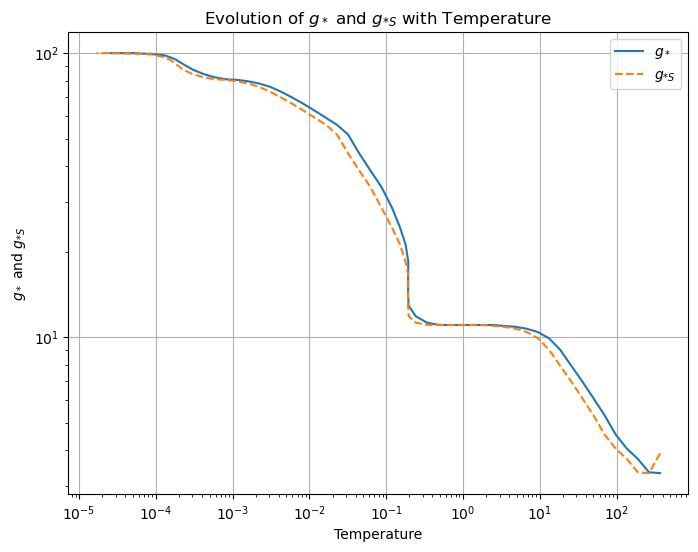

In [92]:
# Load the data
Gstar_df = pd.read_csv("Gstar.csv", header = None)
GstarS_df = pd.read_csv("GstarS.csv", header = None)

# Convert to dictionaries while preserving order
Gstar = dict(zip(Gstar_df.iloc[:, 0], Gstar_df.iloc[:, 1]))
GstarS = dict(zip(GstarS_df.iloc[:, 0], GstarS_df.iloc[:, 1]))


# Extract temperature values and corresponding function values in original order
temps_Gstar = Gstar_df.iloc[:, 0].values  # Keep order from CSV
values_Gstar = np.flip(Gstar_df.iloc[:, 1].values)  

temps_GstarS = GstarS_df.iloc[:, 0].values  # Keep order from CSV
values_GstarS = np.flip(GstarS_df.iloc[:, 1].values)  

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(temps_Gstar, values_Gstar, label="$g_*$", linestyle="-")
plt.plot(temps_GstarS, values_GstarS, label="$g_{*S}$", linestyle="--")
plt.xscale('log')

plt.yscale('log')

# Labels and title
plt.xlabel("Temperature")
plt.ylabel("$g_*$ and $g_{*S}$")
plt.title("Evolution of $g_*$ and $g_{*S}$ with Temperature")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
"""
Y0 = [1e5]  
x_min = 1e-5 
x_max = 100
x_span = (x_min, x_max)
x_eval = np.geomspace(x_min, x_max, 5000)

# THE STRING ENCLOSED WITHIN THE "" IS TELLING THE CODE WHAT RATIO TO USE REGARDLESS OF WHAT VARIABLE YOU PASS THROUGH NEXT
sigma_values = {
    "TestMeson": Sigma_Meson,
    #"TestBaryon": Sigma_Baryon
}

for particle, sigma_value in sigma_values.items():
    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), x_span, Y0, t_eval=x_eval)
    print(particle)

    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)
    y0 = lambda Y: sol_Y0.sol(Y)[0]
    print(f'y(0) = {y0(0)}')    

    # Number of frozen-out DM particles
    Y_frozen = sol.y[0, -1]
    print(f'Frozen-out Y(x) for {particle} = {Y_frozen}')
    print(f'Cross section of {particle} = {sigma_value}')
    
    plt.plot(sol.t, sol.y[0]/y0(0), label=f'{particle}')
    
# Plot configurations
plt.yscale('log')  
plt.xscale('log')  
plt.xlabel('log(x = m/T)')
plt.ylabel('log(Y/Y(x=0))')
plt.title('Log plot of Y(x) for different $\sigma$ values')
plt.legend()
plt.grid(True)
#plt.savefig('DifferentSigmaSValues.png', facecolor='w')

plt.show()
"""

In [ ]:
"""
%run FreezeOutFunctions.ipynb
%run CrossSectionFunctions.ipynb

#Y0 = [10]  
x_min = 1e-2 
x_max = 100
x_span = (x_min, x_max)
x_eval = np.geomspace(x_min, x_max, 5000)
xx=np.logspace(np.log10(1.1),np.log10(1e100),1000)
xx = np.log10(xx)

sigma_values = ["TestMeson"]#, "TestBaryon", "TestMeson2", "TestMeson3", "TestMeson4", "TestMeson5"]


for particle in sigma_values:
    Y0 = [YInitial(particle)]
    sol = solve_ivp(lambda x, Y: dYdx(x, Y, particle), (np.log10(1.1),np.log10(1e100)), Y0, t_eval=xx)

    sol_Y0 = solve_ivp(lambda x, Y: dYdx(1, Y, particle), x_span, Y0, dense_output=True)
    y0 = lambda Y: sol_Y0.sol(Y)[0]
    #print(f'y(0) = {y0(0)}')
    
    # Number of frozen-out DM particles
    #print(sol.y)
    Y_frozen = sol.y[0, -1]
    print(f'Frozen-out Y(x) for {particle} = {Y_frozen}')
    
    plt.loglog(sol.t, sol.y[0], label=f'{particle}')

Y = Y_EQ(xx, "TestMeson")
plt.loglog(xx, Y, label="Y_EQ")

# Plot configurations
#plt.yscale('log')  
#plt.xscale('log')  
plt.xlabel('log(x = m/T)')
plt.ylabel('log(Y/Y(0))')
plt.title('Log plot of Y(x) for different $\sigma$ values')
plt.legend()
plt.grid(True)
#plt.ylim(1e-15, 15)
#plt.savefig('DifferentSigmaSValues.png', facecolor='w')

plt.show()
"""

In [ ]:
"""
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint

Mp = M_Pl

def fk(particle):
    mass = particle_mass.get(particle,1)
    cross_section = particle_cross_sections.get(particle,1)
    return np.sqrt(np.pi*Mp**2/45)*mass*cross_section

def Y_EQ(x, particle):
    mass = particle_mass.get(particle, 1)
    return n_eq(x, particle) / s(x, particle)

def BEx(x, particle):
    mass = particle_mass.get(particle,1)
    T=mass/x

    return k*g_star(T)/x**2

def BE(Y,x,particle):
    return -(Y**2-Y_EQ(x, particle)**2)*BEx(x, particle)
"""

In [ ]:
"""
%run CrossSectionFunctions.ipynb

xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Y_EQ(xx, particle),'c',label=r'$Y_{\rm eq}$')

k=fk("TestMeson")
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Y_EQ(x[0], particle),x, args=(particle,))
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()
"""